# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

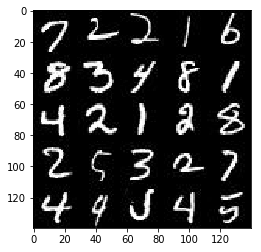

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

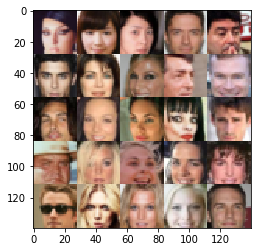

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    #print (type(image_width))
    #print (type(image_height))
    #print (type(image_channels))
    #print (type(z_dim))
    #print (z_dim)
    
    input_images = tf.placeholder(tf.float32, shape=[None,image_width,image_height,image_channels], name='input_images')
    #input_images = tf.placeholder(tf.float32, shape=[None,z_dim], name='input_images')
    z_data = tf.placeholder(tf.float32,shape=[None,z_dim],name='z_data')
    learning_rate = tf.placeholder(tf.float32,name='learning_rate')

    return (input_images,z_data,learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [9]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    #print (type(images))
    #shape = images.get_shape().as_list()
    #print(shape)
    alpha=0.2
    with tf.variable_scope('discriminator', reuse=reuse):
    # Input layer is 28x28x3
        layer1 = tf.layers.conv2d(images, 64, 4, strides=2, padding='same')
        #print (layer1.get_shape().as_list())
        relu1 = tf.maximum(alpha * layer1, layer1)
        # 14x14x64
        
        layer2 = tf.layers.conv2d(relu1, 128, 4, strides=1, padding='same')
        #print (layer2.get_shape().as_list())
        bn2 = tf.layers.batch_normalization(layer2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 14x14x128
        
        layer3 = tf.layers.conv2d(relu2, 256, 4, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(layer3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        #print (layer3.get_shape().as_list())
        # 7x7x256
        
        layer4 = tf.layers.conv2d(relu3, 512, 4, strides=1, padding='same')
        bn4 = tf.layers.batch_normalization(layer4, training=True)
        relu4 = tf.maximum(alpha * bn4, bn4)
        #print (layer4.get_shape().as_list())
        # 7x7x512
        
        layer5 = tf.layers.conv2d(relu4, 1024, 4, strides=2, padding='same')
        bn5 = tf.layers.batch_normalization(layer4, training=True)
        relu5 = tf.maximum(alpha * bn5, bn5)
        #print (layer5.get_shape().as_list())
        # 4x4x1024


        # Flatten it
        flat = tf.reshape(relu5, (-1, 4*4*1024))
        #print (flat.get_shape().as_list())
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        #print (out.get_shape().as_list())


    return (out,logits)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [10]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    #print (type(z))
    #print (type(out_channel_dim))
    #print (z.get_shape().as_list()[-1])
    #print (out_channel_dim)
    alpha=0.2
    #if is_train==True:
        #reuse=False
    #else:
        #reuse=True
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        layer0 = tf.layers.dense(z, 4*4*1024)
        # Reshape it to start the convolutional stack
        layer0 = tf.reshape(layer0, (-1, 4, 4, 1024))
        layer0 = tf.layers.batch_normalization(layer0, training=is_train)
        layer0 = tf.maximum(alpha * layer0, layer0)
        # 4x4x1024 now
        
        layer1 = tf.layers.conv2d_transpose(layer0, 512, 4, strides=1, padding='valid')
        layer1 = tf.layers.batch_normalization(layer1, training=is_train)
        layer1 = tf.maximum(alpha * layer1, layer1)
        # 7x7x512 now
        
        
        layer2 = tf.layers.conv2d_transpose(layer1, 256, 4, strides=1, padding='same')
        layer2 = tf.layers.batch_normalization(layer2, training=is_train)
        layer2 = tf.maximum(alpha * layer2, layer2)
        # 7x7x256 now
        
        layer3 = tf.layers.conv2d_transpose(layer2, 128, 4, strides=2, padding='same')
        layer3 = tf.layers.batch_normalization(layer3, training=is_train)
        layer3 = tf.maximum(alpha * layer3, layer3)
        #print (layer3.get_shape().as_list())
        # 14x14x128 now
        
        layer4 = tf.layers.conv2d_transpose(layer3, 64, 4, strides=1, padding='same')
        layer4 = tf.layers.batch_normalization(layer4, training=is_train)
        layer4 = tf.maximum(alpha * layer4, layer4)
        #print (layer4.get_shape().as_list())
        # 14x14x64 now

        
        # Output layer
        logits = tf.layers.conv2d_transpose(layer4, out_channel_dim, 4, strides=2, padding='same')
        #print (logits.get_shape().as_list())
        # 28x28x3 now
        
        out = tf.tanh(logits) 
        out = out
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [11]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_real_out, d_real_logits = discriminator(input_real, reuse=False)
    d_fake_out, d_fake_logits = discriminator(g_model, reuse=True)
    
    d_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_real_logits, labels=tf.ones_like(d_real_logits)*(1 - smooth)))
    d_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, labels=tf.zeros_like(d_fake_logits)))
    g_loss      = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, labels=tf.ones_like(d_fake_logits)))
    
    d_loss = d_real_loss + d_fake_loss
    return (d_loss , g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [12]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    all_vars = tf.trainable_variables()
    d_vars = [var for var in all_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in all_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_opt=tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_opt=tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
    return (d_opt,g_opt)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [14]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [15]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    print ("image_mode{}:".format(data_image_mode))
    print ("data_shape{}:".format(data_shape))
    input_real,input_z,learn_rate = model_inputs(data_shape[1] , data_shape[2] , data_shape[3] , z_dim)
    d_loss , g_loss = model_loss(input_real , input_z, data_shape[3])
    d_opt , g_opt = model_opt(d_loss,g_loss,learn_rate,beta1)
    
    print("dataset_length:{}".format(data_shape[0]))
    plot_show_every = 400
    loss_show_every = 80
    
    print('model built')
    
    with tf.Session() as sess:
        print ('starting training')
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            print("current_epoch:{}".format(epoch_i))
            batch_step = 1
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                #print('running opt')
                batch_images = batch_images * 2.0
                batch_z = np.random.uniform(-1 , 1 , size=[batch_size,z_dim])
                _ =sess.run(d_opt, feed_dict={input_real:batch_images , input_z:batch_z, learn_rate:learning_rate})
                _ =sess.run(g_opt, feed_dict={input_z:batch_z, input_real:batch_images , learn_rate:learning_rate})
                _ =sess.run(d_opt, feed_dict={input_real:batch_images , input_z:batch_z, learn_rate:learning_rate})
                _ =sess.run(g_opt, feed_dict={input_z:batch_z, input_real:batch_images , learn_rate:learning_rate})

                
                #print("Batch_step:{}".format(batch_step))
                if batch_step % plot_show_every == 0:
                    n_images = 25
                    show_generator_output(sess, n_images, input_z, data_shape[3], data_image_mode)
                    
                if batch_step % loss_show_every == 0:
                    train_loss_d=d_loss.eval({input_z: batch_z , input_real: batch_images})
                    train_loss_g=g_loss.eval({input_z: batch_z})
                    print("D_loss:{:.4f}".format(train_loss_d),
                          "G_loss:{:.4f}".format(train_loss_g))
                    
                batch_step += 1 
        
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

image_modeL:
data_shape(60000, 28, 28, 1):
dataset_length:60000
model built
starting training
current_epoch:0
D_loss:1.1419 G_loss:1.1659
D_loss:1.2730 G_loss:0.9811
D_loss:1.0175 G_loss:1.2687
D_loss:1.3427 G_loss:0.9066


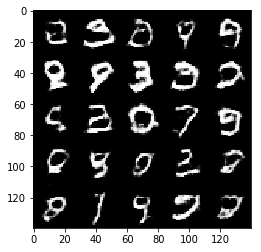

D_loss:1.5249 G_loss:1.8166
D_loss:1.3297 G_loss:1.1703
D_loss:1.0349 G_loss:1.2806
D_loss:1.1524 G_loss:1.0715
D_loss:1.1907 G_loss:1.2604


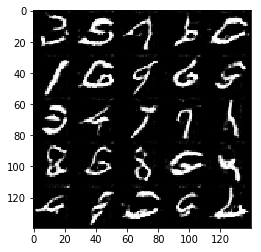

D_loss:1.0410 G_loss:1.5005
D_loss:1.1444 G_loss:1.6603
D_loss:1.1061 G_loss:1.1338
D_loss:1.1125 G_loss:1.1268
D_loss:1.0872 G_loss:1.2361


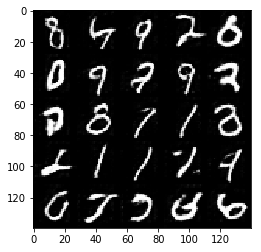

D_loss:1.0366 G_loss:1.2028
D_loss:1.1471 G_loss:1.2663
D_loss:1.0589 G_loss:1.2265
D_loss:1.1039 G_loss:1.3102
D_loss:1.2001 G_loss:1.0386


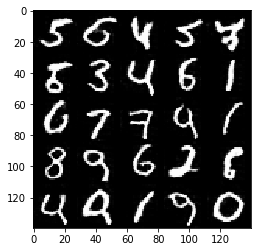

D_loss:1.0664 G_loss:1.2910
D_loss:1.1519 G_loss:1.1080
D_loss:1.0490 G_loss:1.2293
D_loss:1.1473 G_loss:1.0234
current_epoch:1
D_loss:1.1134 G_loss:1.3161
D_loss:1.1631 G_loss:1.0481
D_loss:1.1358 G_loss:1.0865
D_loss:1.2568 G_loss:1.2641


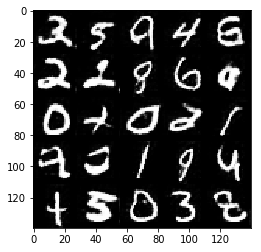

D_loss:1.1492 G_loss:1.2078
D_loss:1.1027 G_loss:1.1913
D_loss:1.1085 G_loss:1.1270
D_loss:1.2359 G_loss:1.2083
D_loss:1.2208 G_loss:1.1438


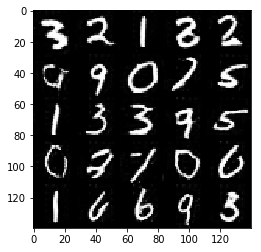

D_loss:0.9653 G_loss:1.3019
D_loss:1.0499 G_loss:1.3068
D_loss:1.0595 G_loss:1.1824
D_loss:1.0865 G_loss:1.3545
D_loss:1.1455 G_loss:0.9015


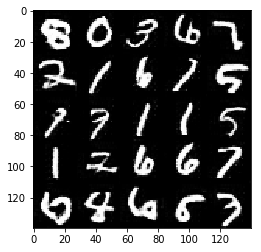

D_loss:1.0869 G_loss:1.2500
D_loss:0.9951 G_loss:1.3157
D_loss:1.1209 G_loss:1.0378
D_loss:1.3570 G_loss:1.3844
D_loss:1.0529 G_loss:1.1972


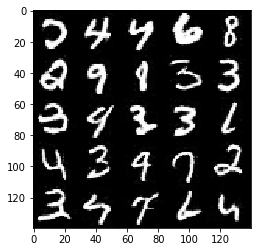

D_loss:0.9813 G_loss:1.3991
D_loss:1.0719 G_loss:1.3570
D_loss:1.0594 G_loss:1.2780
D_loss:1.1079 G_loss:1.0680


In [19]:
batch_size = 32
z_dim = 32
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)
    

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

image_modeRGB:
data_shape(202599, 28, 28, 3):
dataset_length:202599
model built
starting training
current_epoch:0
D_loss:1.4011 G_loss:0.5842
D_loss:1.0883 G_loss:1.0633
D_loss:1.1150 G_loss:0.9371
D_loss:1.1770 G_loss:0.9003


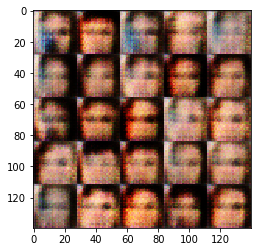

D_loss:1.1629 G_loss:0.8749
D_loss:1.2829 G_loss:0.9141
D_loss:1.2347 G_loss:0.8388
D_loss:1.2541 G_loss:0.8467
D_loss:0.9598 G_loss:1.1239


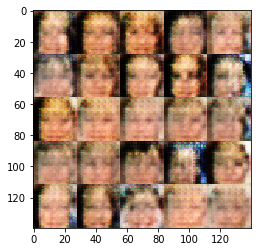

D_loss:1.1492 G_loss:0.8642
D_loss:1.1932 G_loss:0.9669
D_loss:1.1876 G_loss:0.6715
D_loss:1.1445 G_loss:0.9412
D_loss:1.2338 G_loss:0.8592


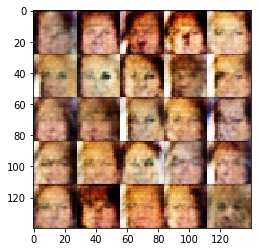

D_loss:1.2380 G_loss:0.8942
D_loss:1.2604 G_loss:0.9762
D_loss:1.1260 G_loss:0.7945
D_loss:1.1884 G_loss:1.0353
D_loss:1.1203 G_loss:1.0459


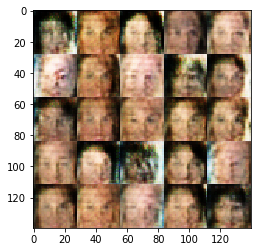

D_loss:1.1857 G_loss:1.1312
D_loss:1.1241 G_loss:0.9674
D_loss:1.0020 G_loss:0.9085
D_loss:1.1091 G_loss:0.9621
D_loss:1.1883 G_loss:1.0983


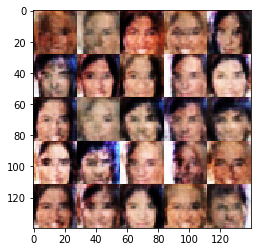

D_loss:1.0137 G_loss:0.8956
D_loss:1.3072 G_loss:0.7958
D_loss:1.1959 G_loss:0.9936
D_loss:1.1275 G_loss:1.0101
D_loss:1.1654 G_loss:0.8829


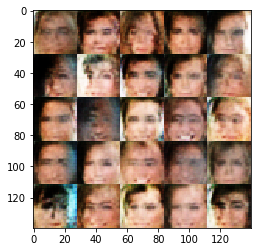

D_loss:1.1110 G_loss:0.9829
D_loss:1.2091 G_loss:0.9316
D_loss:1.1006 G_loss:0.8579
D_loss:1.1046 G_loss:0.9701
D_loss:1.1238 G_loss:0.9848


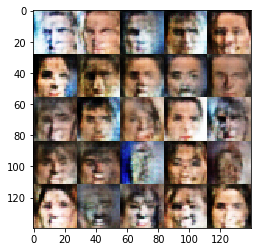

D_loss:1.3631 G_loss:0.8065
D_loss:1.2329 G_loss:0.8189
D_loss:1.0490 G_loss:1.0788
D_loss:1.0259 G_loss:0.8225
D_loss:1.0222 G_loss:0.9306


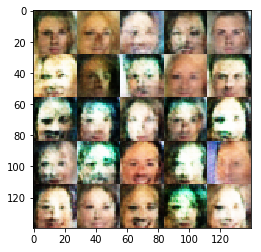

D_loss:1.0209 G_loss:1.0199
D_loss:1.1873 G_loss:0.8470
D_loss:1.1640 G_loss:0.8713
D_loss:1.1270 G_loss:0.9754
D_loss:1.1509 G_loss:0.9645


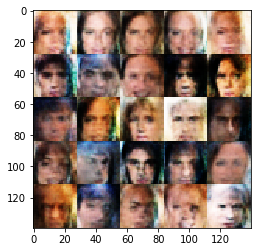

D_loss:1.1550 G_loss:0.9698
D_loss:1.0598 G_loss:0.9441
D_loss:1.0845 G_loss:0.8710
D_loss:0.9364 G_loss:1.0182
D_loss:1.0769 G_loss:1.0199


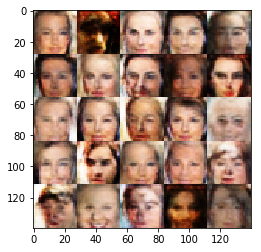

D_loss:1.0992 G_loss:1.1833
D_loss:1.0953 G_loss:1.0635
D_loss:0.9591 G_loss:1.0635
D_loss:1.0778 G_loss:0.9823
D_loss:0.8477 G_loss:1.0955


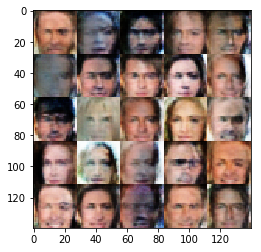

D_loss:1.0593 G_loss:0.9256
D_loss:1.1076 G_loss:0.9731
D_loss:1.1686 G_loss:0.7834
D_loss:1.0068 G_loss:1.1892
D_loss:1.0219 G_loss:0.9575


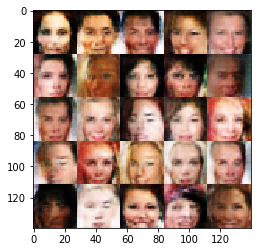

D_loss:1.0393 G_loss:0.9667
D_loss:1.1165 G_loss:0.9415
D_loss:1.2053 G_loss:0.8461
D_loss:1.3163 G_loss:0.7720
D_loss:1.1029 G_loss:0.9820


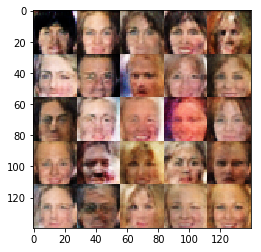

D_loss:0.8925 G_loss:1.4758
D_loss:1.0726 G_loss:1.0901
D_loss:0.9802 G_loss:1.0417
D_loss:1.1322 G_loss:0.9859
D_loss:1.1470 G_loss:0.9755


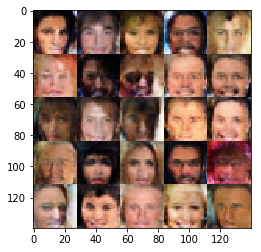

D_loss:1.2134 G_loss:0.8657
D_loss:1.1053 G_loss:1.0379
D_loss:1.0439 G_loss:0.9964
D_loss:1.0560 G_loss:1.0482
D_loss:1.0403 G_loss:0.9559


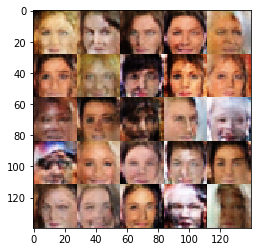

D_loss:0.9555 G_loss:1.1329
D_loss:1.2624 G_loss:1.0592
D_loss:1.2053 G_loss:0.8376
D_loss:1.3558 G_loss:0.9877
D_loss:0.9918 G_loss:0.9031
current_epoch:1
D_loss:0.8331 G_loss:1.2544
D_loss:0.9144 G_loss:1.1522
D_loss:1.0830 G_loss:0.8465
D_loss:0.9715 G_loss:1.1765


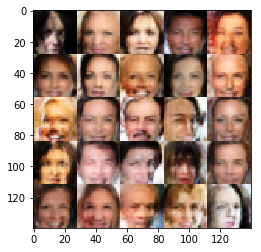

D_loss:1.2189 G_loss:0.7800
D_loss:1.0417 G_loss:0.9957
D_loss:0.8388 G_loss:1.1848
D_loss:0.9235 G_loss:1.2480
D_loss:1.0113 G_loss:1.0003


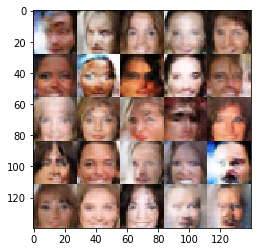

D_loss:0.9238 G_loss:1.0625
D_loss:1.0589 G_loss:1.0686
D_loss:0.9797 G_loss:0.9663
D_loss:1.0207 G_loss:0.9648
D_loss:1.4155 G_loss:0.7502


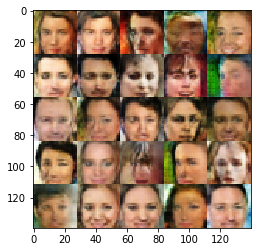

D_loss:1.1059 G_loss:1.0483
D_loss:0.7983 G_loss:1.2930
D_loss:1.0190 G_loss:1.2304
D_loss:1.0222 G_loss:0.9590
D_loss:0.9333 G_loss:1.1341


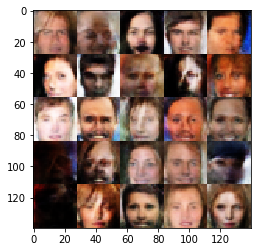

D_loss:0.9073 G_loss:1.1656
D_loss:0.8492 G_loss:1.2238
D_loss:0.9414 G_loss:1.0990
D_loss:0.8837 G_loss:1.2480
D_loss:1.0353 G_loss:1.1126


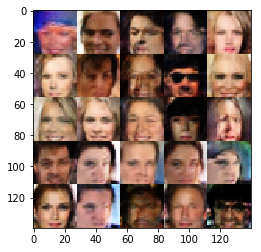

D_loss:1.1052 G_loss:1.1422
D_loss:1.0791 G_loss:1.2504
D_loss:0.8547 G_loss:1.3159
D_loss:0.9394 G_loss:1.0702
D_loss:1.0366 G_loss:0.8942


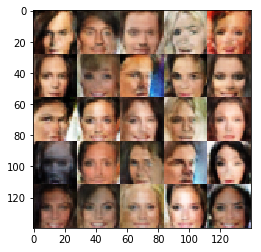

D_loss:1.0768 G_loss:1.1728
D_loss:0.9830 G_loss:1.1044
D_loss:1.0138 G_loss:0.9310
D_loss:0.7914 G_loss:1.3914
D_loss:0.7746 G_loss:1.3755


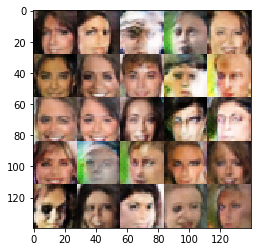

D_loss:0.9926 G_loss:1.1546
D_loss:0.9857 G_loss:1.0687
D_loss:0.9370 G_loss:0.9738
D_loss:0.7269 G_loss:1.3316
D_loss:0.9391 G_loss:1.1628


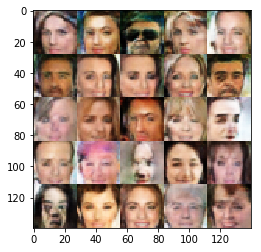

D_loss:0.9299 G_loss:1.0368
D_loss:0.9901 G_loss:0.9971
D_loss:0.9464 G_loss:1.0706
D_loss:1.3209 G_loss:0.6385
D_loss:0.9612 G_loss:1.1109


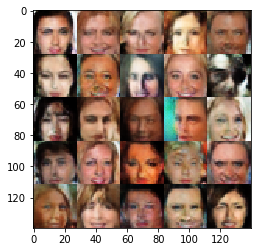

D_loss:0.7860 G_loss:1.2657
D_loss:0.7617 G_loss:1.2743
D_loss:0.9177 G_loss:1.0573
D_loss:0.9141 G_loss:1.2686
D_loss:0.9427 G_loss:1.1246


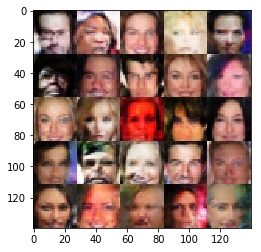

D_loss:1.0466 G_loss:0.9645
D_loss:0.8224 G_loss:1.2758
D_loss:0.9128 G_loss:0.9963
D_loss:1.0460 G_loss:0.9649
D_loss:0.6767 G_loss:1.4075


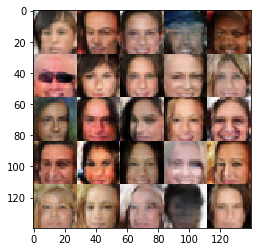

D_loss:0.8775 G_loss:1.2567
D_loss:0.8104 G_loss:1.2317
D_loss:0.8827 G_loss:1.1405
D_loss:0.9133 G_loss:1.1490
D_loss:0.8645 G_loss:1.1948


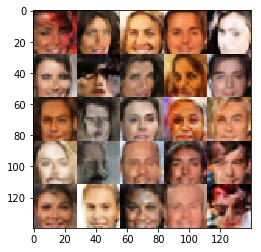

D_loss:0.7649 G_loss:1.2358
D_loss:0.6661 G_loss:1.4582
D_loss:1.0095 G_loss:0.9761
D_loss:0.9796 G_loss:0.9941
D_loss:0.9767 G_loss:1.0324


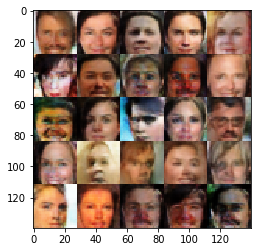

D_loss:0.8304 G_loss:1.1240
D_loss:0.8209 G_loss:1.2863
D_loss:1.3327 G_loss:0.6611
D_loss:0.8829 G_loss:1.1655
D_loss:1.1018 G_loss:0.7580


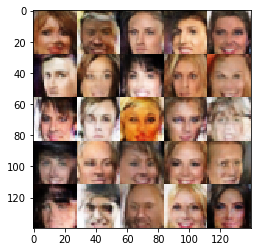

D_loss:0.8869 G_loss:1.0213
D_loss:0.9238 G_loss:1.0788
D_loss:0.8321 G_loss:1.1541
D_loss:0.7107 G_loss:1.2669
D_loss:0.9804 G_loss:1.0827


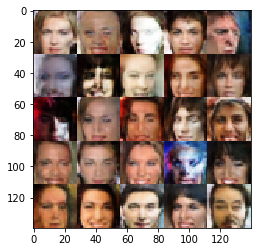

D_loss:0.9094 G_loss:1.0046
D_loss:0.9428 G_loss:1.0245
D_loss:0.8750 G_loss:1.1282
D_loss:0.9657 G_loss:1.1539
D_loss:0.8848 G_loss:1.1082
current_epoch:2
D_loss:0.9814 G_loss:1.0494
D_loss:0.8760 G_loss:1.1430
D_loss:0.8371 G_loss:1.1554
D_loss:0.7710 G_loss:1.3202


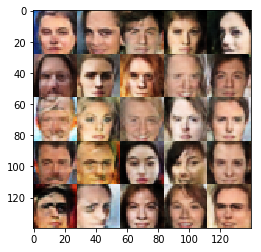

D_loss:1.1294 G_loss:0.8913
D_loss:0.8311 G_loss:1.2308
D_loss:0.9256 G_loss:0.9586
D_loss:0.7828 G_loss:1.3405
D_loss:0.8097 G_loss:1.1755


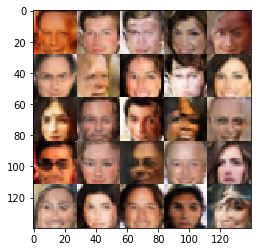

D_loss:0.7967 G_loss:1.2614
D_loss:0.7346 G_loss:1.2994
D_loss:0.7405 G_loss:1.2404
D_loss:0.9102 G_loss:1.2162
D_loss:0.8128 G_loss:1.1557


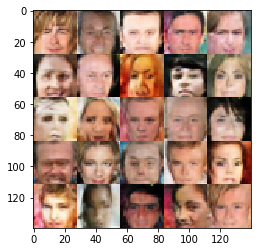

D_loss:0.7889 G_loss:1.2087
D_loss:0.8915 G_loss:1.1941
D_loss:0.8184 G_loss:1.1549
D_loss:0.9034 G_loss:1.3413
D_loss:0.7714 G_loss:1.2493


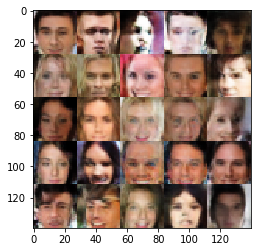

D_loss:0.8301 G_loss:1.1327
D_loss:0.8953 G_loss:1.0610
D_loss:0.8544 G_loss:1.2269
D_loss:0.7607 G_loss:1.2680
D_loss:0.7559 G_loss:1.4043


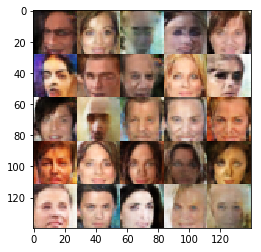

D_loss:0.7786 G_loss:1.4117
D_loss:0.7405 G_loss:1.3078
D_loss:0.7923 G_loss:1.4183
D_loss:0.7637 G_loss:1.5888
D_loss:0.7909 G_loss:1.3999


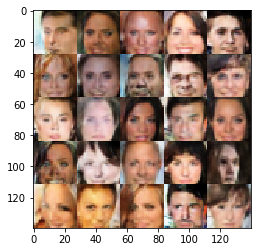

D_loss:0.6049 G_loss:1.6688
D_loss:1.2965 G_loss:0.6869
D_loss:0.7225 G_loss:1.3450
D_loss:0.7589 G_loss:1.3824
D_loss:0.7484 G_loss:1.1949


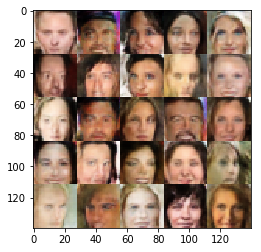

D_loss:0.7726 G_loss:1.1546
D_loss:0.9712 G_loss:1.6545
D_loss:0.6529 G_loss:1.5622
D_loss:0.4552 G_loss:2.6318
D_loss:0.7685 G_loss:1.3359


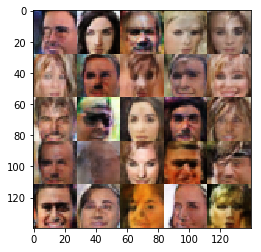

D_loss:0.8650 G_loss:1.1952
D_loss:0.8810 G_loss:1.2111
D_loss:0.9722 G_loss:0.8516
D_loss:1.0483 G_loss:0.8067
D_loss:0.8905 G_loss:1.0834


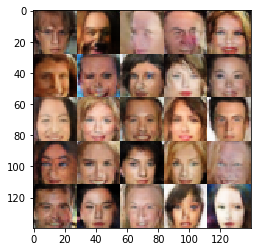

D_loss:0.7289 G_loss:1.3663
D_loss:0.6664 G_loss:1.4304
D_loss:0.7232 G_loss:1.4984
D_loss:0.7285 G_loss:1.4534
D_loss:0.8003 G_loss:1.2485


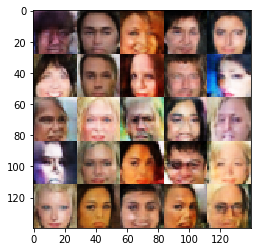

D_loss:0.9593 G_loss:0.9606
D_loss:0.7291 G_loss:1.3122
D_loss:0.7747 G_loss:1.1827
D_loss:0.7971 G_loss:1.3956
D_loss:0.6341 G_loss:1.5196


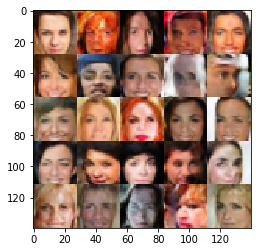

D_loss:0.7545 G_loss:1.3569
D_loss:0.7410 G_loss:1.3704
D_loss:0.6741 G_loss:1.5749
D_loss:0.7318 G_loss:1.4009
D_loss:0.8756 G_loss:1.1485


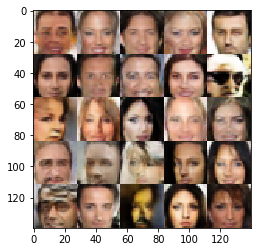

D_loss:0.7220 G_loss:1.4189
D_loss:0.7355 G_loss:1.3874
D_loss:0.7296 G_loss:1.3817
D_loss:0.6969 G_loss:1.4688
D_loss:0.8493 G_loss:1.0654


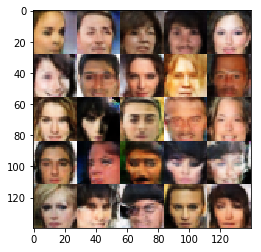

D_loss:0.7188 G_loss:1.4138
D_loss:0.9011 G_loss:1.3379
D_loss:0.9522 G_loss:0.8689
D_loss:0.8771 G_loss:0.9979
D_loss:0.7949 G_loss:1.1434


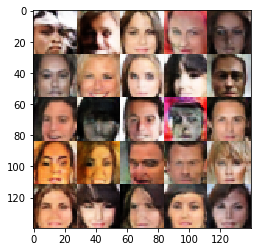

D_loss:0.5599 G_loss:2.0901
D_loss:0.9396 G_loss:1.2281
D_loss:0.8423 G_loss:1.3834
D_loss:0.4315 G_loss:2.8724
D_loss:0.7399 G_loss:1.3003


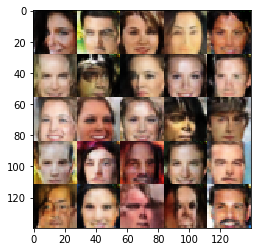

D_loss:0.8085 G_loss:1.2281
D_loss:0.6986 G_loss:1.3162
D_loss:0.7963 G_loss:1.2039
D_loss:0.7979 G_loss:1.2577
D_loss:0.8113 G_loss:1.2876
current_epoch:3
D_loss:0.8014 G_loss:1.5254
D_loss:0.7169 G_loss:1.3384
D_loss:0.7551 G_loss:1.1729
D_loss:0.6861 G_loss:1.4673


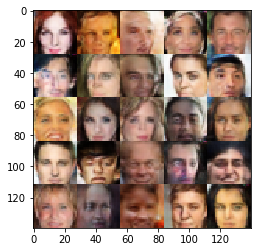

D_loss:0.8963 G_loss:1.2889
D_loss:0.7221 G_loss:1.5722
D_loss:0.7981 G_loss:1.2823
D_loss:0.7253 G_loss:1.3065
D_loss:0.6520 G_loss:1.4794


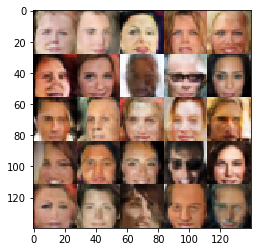

D_loss:0.6803 G_loss:1.7488
D_loss:0.5730 G_loss:1.7613
D_loss:0.7124 G_loss:1.5365
D_loss:0.7119 G_loss:1.6873
D_loss:0.6370 G_loss:1.8074


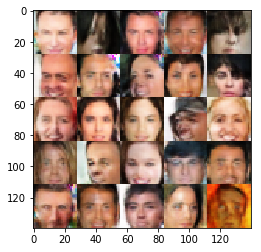

D_loss:0.7487 G_loss:1.4810
D_loss:0.6874 G_loss:1.6104
D_loss:0.7263 G_loss:1.2684
D_loss:0.6144 G_loss:1.7149
D_loss:0.7082 G_loss:1.3452


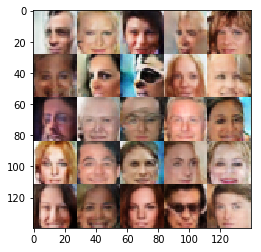

D_loss:0.6794 G_loss:2.0597
D_loss:0.7091 G_loss:1.3441
D_loss:0.6935 G_loss:1.4473
D_loss:0.7210 G_loss:1.3572
D_loss:0.6832 G_loss:1.6633


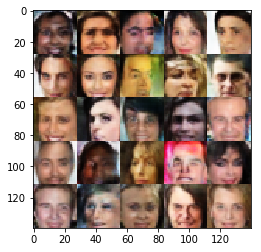

D_loss:0.6343 G_loss:1.5332
D_loss:0.6347 G_loss:1.6905
D_loss:0.7407 G_loss:1.2807
D_loss:0.6187 G_loss:1.6276
D_loss:0.6564 G_loss:1.4591


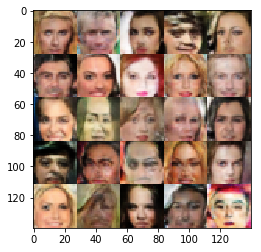

D_loss:0.5945 G_loss:1.8048
D_loss:0.7868 G_loss:1.6404
D_loss:0.6430 G_loss:1.7258
D_loss:0.6345 G_loss:1.5534
D_loss:0.6957 G_loss:1.3661


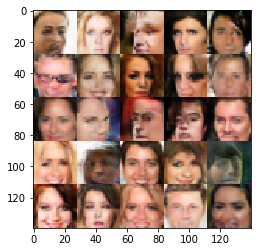

D_loss:0.6788 G_loss:1.3593
D_loss:0.6981 G_loss:1.4244
D_loss:0.6988 G_loss:1.3633
D_loss:0.6835 G_loss:1.4952
D_loss:0.6758 G_loss:1.5012


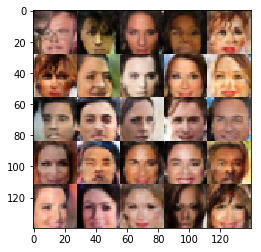

D_loss:0.8603 G_loss:1.0176
D_loss:0.7919 G_loss:1.2557
D_loss:0.7887 G_loss:1.2265
D_loss:0.9804 G_loss:1.4261
D_loss:0.7421 G_loss:1.4474


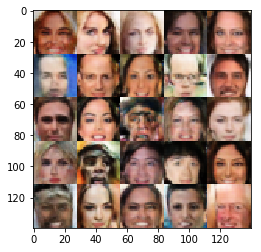

D_loss:0.5215 G_loss:2.0378
D_loss:0.6869 G_loss:1.4550
D_loss:0.7683 G_loss:2.0488
D_loss:0.6661 G_loss:1.4641
D_loss:0.7465 G_loss:1.6077


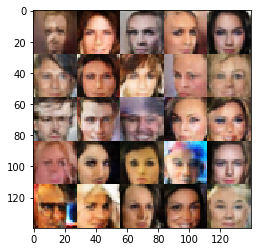

D_loss:0.6652 G_loss:1.6014
D_loss:0.7072 G_loss:1.5029
D_loss:0.6030 G_loss:1.6460
D_loss:0.7996 G_loss:1.3243
D_loss:0.5244 G_loss:2.2794


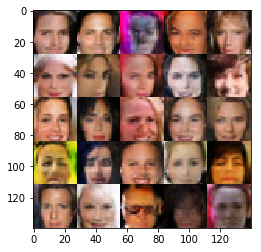

D_loss:0.6888 G_loss:1.3819
D_loss:0.7918 G_loss:1.7110
D_loss:0.4991 G_loss:2.2186
D_loss:0.5971 G_loss:1.6421
D_loss:0.6395 G_loss:1.6111


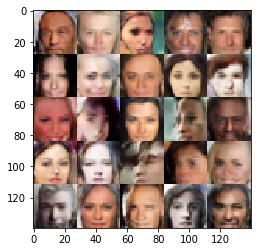

D_loss:0.5821 G_loss:1.8695
D_loss:0.5963 G_loss:1.7462
D_loss:0.7071 G_loss:1.4601
D_loss:0.7314 G_loss:1.4843
D_loss:0.8686 G_loss:1.4216


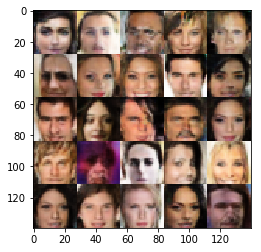

D_loss:0.6741 G_loss:1.5264
D_loss:0.6869 G_loss:1.3647
D_loss:0.6983 G_loss:1.5245
D_loss:0.7172 G_loss:1.3915
D_loss:0.6680 G_loss:1.3836


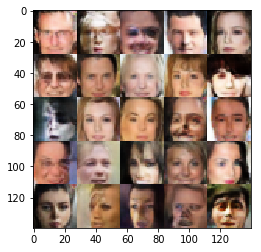

D_loss:0.4913 G_loss:2.3276
D_loss:0.6666 G_loss:2.1053
D_loss:0.5658 G_loss:1.8958
D_loss:0.6248 G_loss:1.5657
D_loss:0.6341 G_loss:1.6209


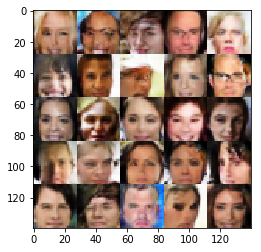

D_loss:0.5509 G_loss:1.8071
D_loss:0.7266 G_loss:1.2645
D_loss:0.7641 G_loss:1.3172
D_loss:0.5826 G_loss:1.7184
D_loss:0.7479 G_loss:1.2959


In [20]:
batch_size = 32
z_dim = 32
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 4

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.